Naveed Khan

# NObeyesdad Analysis & Prediction Using ML Techniques

# Step 1: Check the Structure of the Dataset.





### Import Libraries

In [ ]:
# import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE


from scipy.stats import zscore

import missingno as msno
# evalue measures
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
import seaborn as sns


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

print('imported.')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


imported.


### Read Data

In [ ]:
df = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")


In [ ]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.shape

(2111, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [ ]:
# checking missing values
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


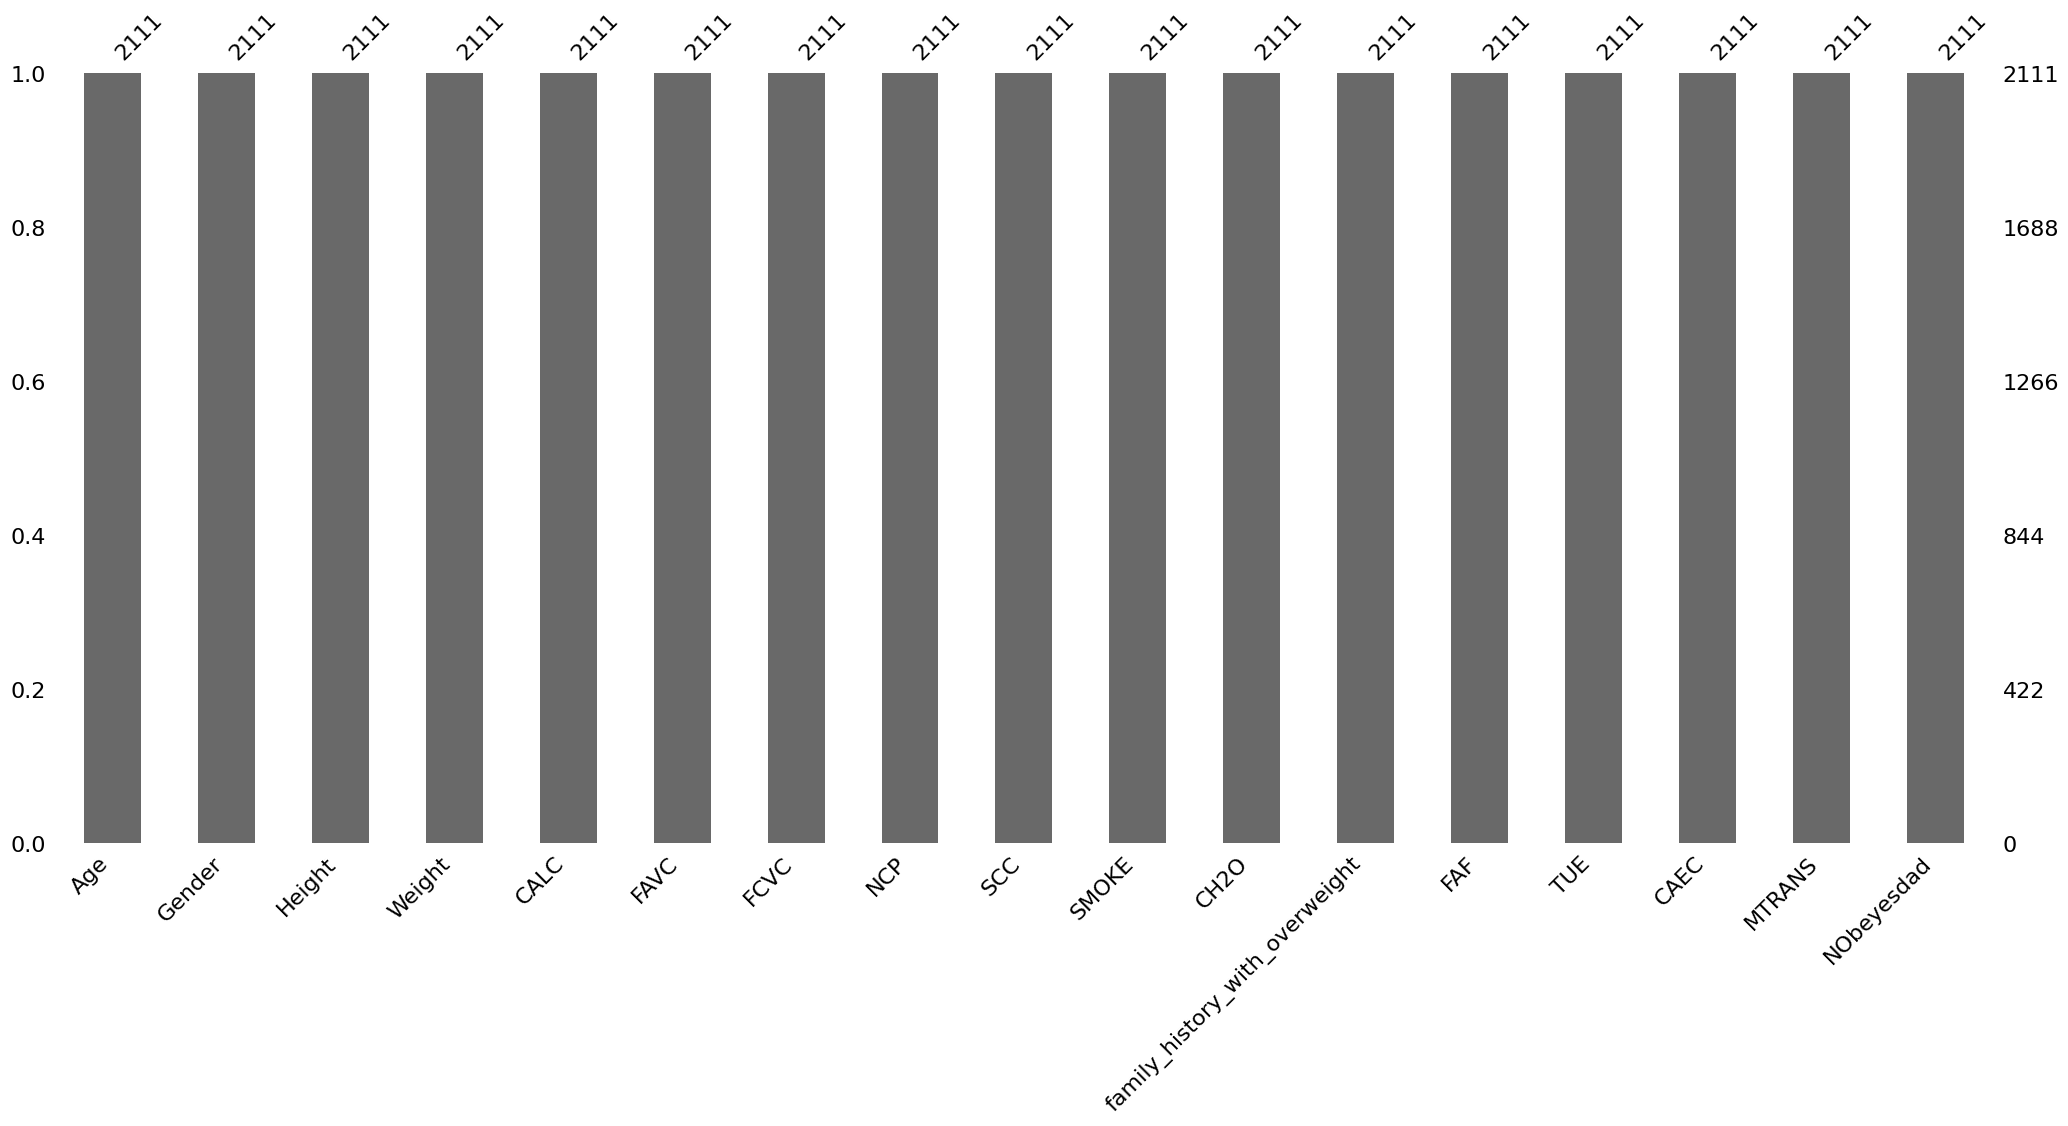

In [ ]:
msno.bar(df)
plt.show()

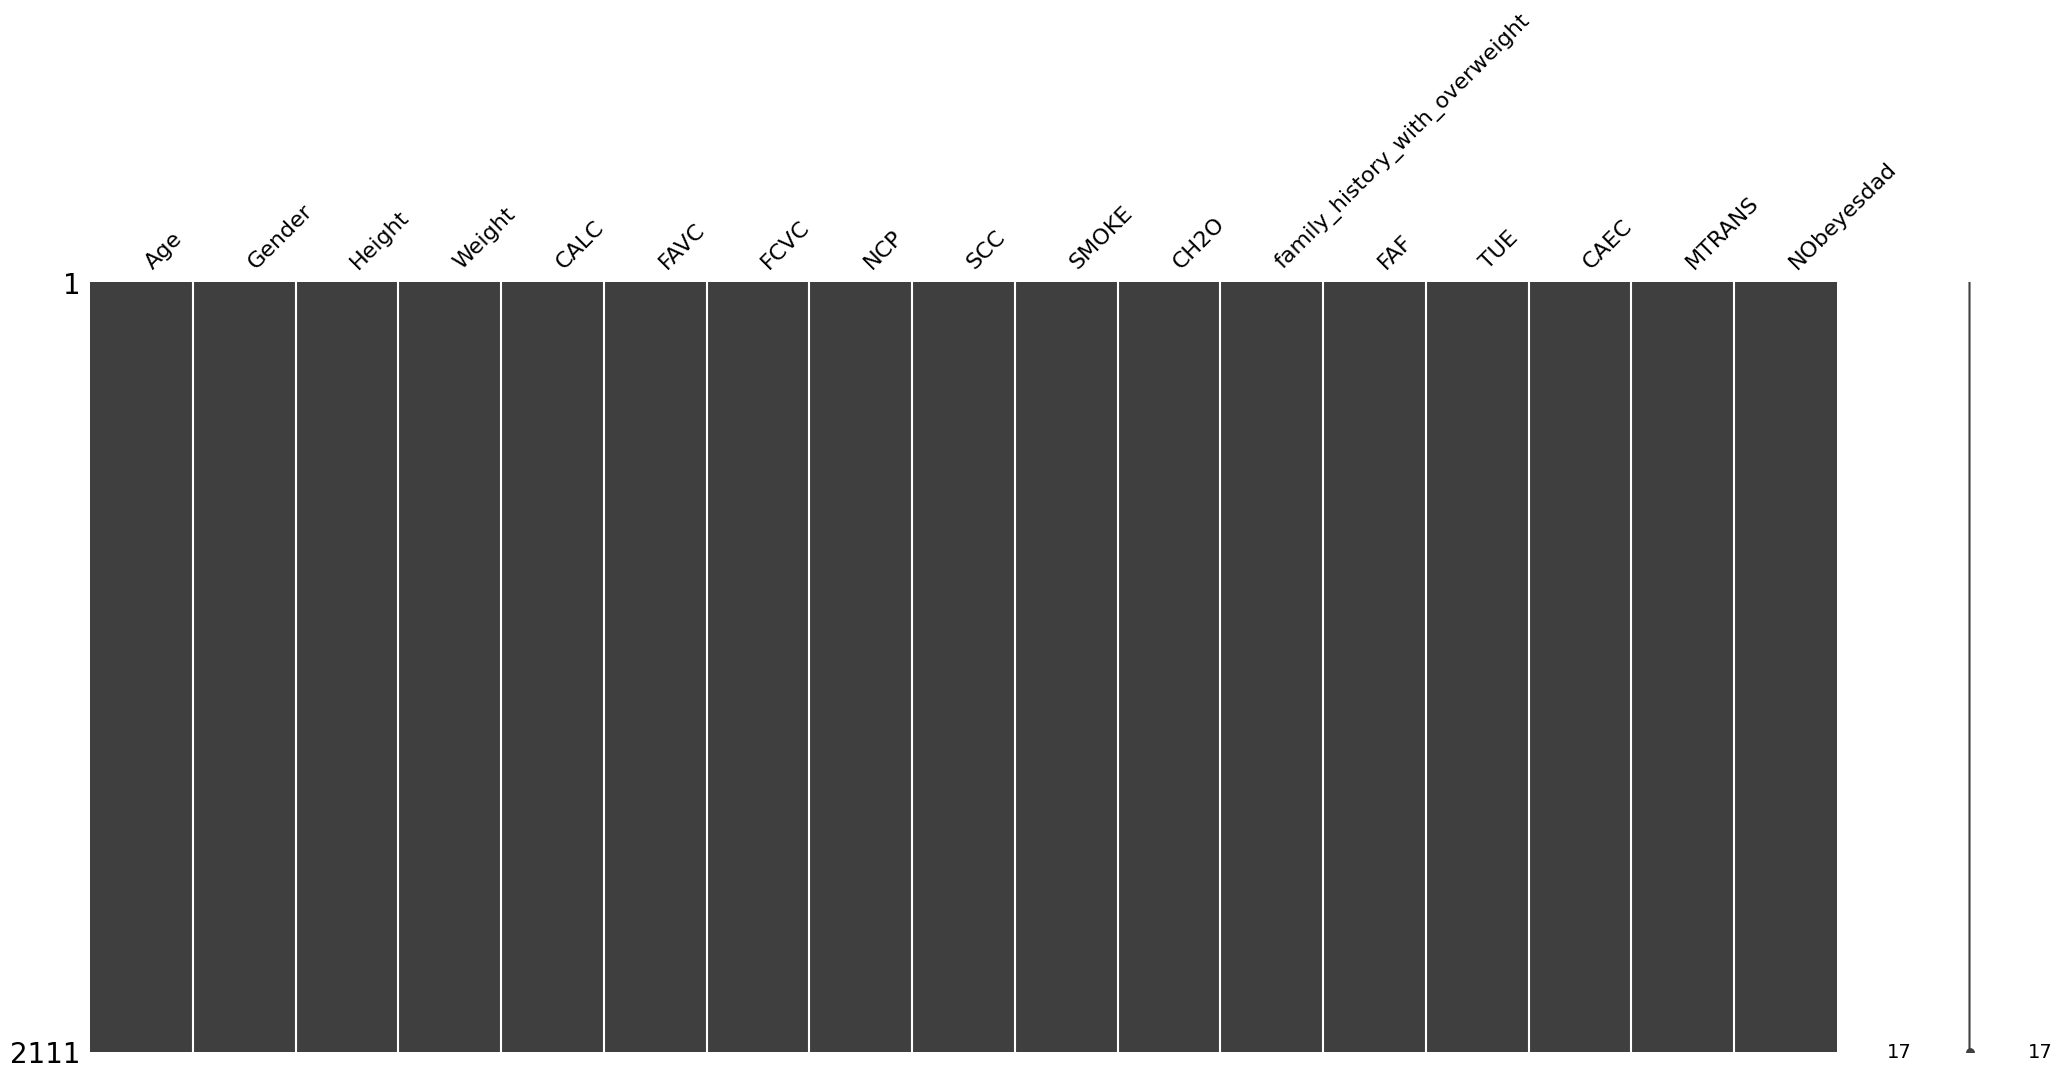

In [ ]:
msno.matrix(df)
plt.show()

In [ ]:
# checking duplicates rows
df.duplicated().sum()

24

### Remove duplicates

In [ ]:
# Remove duplicates..
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

print("Now Duplicates have removed and we have",df.duplicated().sum(), "duplicate values")

Now Duplicates have removed and we have 0 duplicate values


### Descriptive Analysis of Numerical col's

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2087.0,24.353090,6.368801,14.00,19.915937,22.847618,26.000000,61.00
Height,2087.0,1.702674,0.093186,1.45,1.630178,1.701584,1.769491,1.98
Weight,2087.0,86.858730,26.190847,39.00,66.000000,83.101100,108.015907,173.00
FCVC,2087.0,2.421466,0.534737,1.00,2.000000,2.396265,3.000000,3.00
NCP,2087.0,2.701179,0.764614,1.00,2.697467,3.000000,3.000000,4.00
CH2O,2087.0,2.004749,0.608284,1.00,1.590922,2.000000,2.466193,3.00
FAF,2087.0,1.012812,0.853475,0.00,0.124505,1.000000,1.678102,3.00
TUE,2087.0,0.663035,0.608153,0.00,0.000000,0.630866,1.000000,2.00


In [ ]:
pd.set_option("display.float_format", lambda x: '%.3f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2087.000,24.353,6.369,14.000,19.916,22.848,26.000,61.000
Height,2087.000,1.703,0.093,1.450,1.630,1.702,1.769,1.980
Weight,2087.000,86.859,26.191,39.000,66.000,83.101,108.016,173.000
FCVC,2087.000,2.421,0.535,1.000,2.000,2.396,3.000,3.000
NCP,2087.000,2.701,0.765,1.000,2.697,3.000,3.000,4.000
CH2O,2087.000,2.005,0.608,1.000,1.591,2.000,2.466,3.000
FAF,2087.000,1.013,0.853,0.000,0.125,1.000,1.678,3.000
TUE,2087.000,0.663,0.608,0.000,0.000,0.631,1.000,2.000


***

### Encoding (Boolean into Binary)

In [ ]:
# Boolean col's
bool_cols = df[["SCC", "FAVC", "SMOKE", "family_history_with_overweight"]]
bool_cols

,SCC,FAVC,SMOKE,family_history_with_overweight
0,no,no,no,yes
1,yes,no,yes,yes
2,no,no,no,yes
3,no,no,no,no
4,no,no,no,no
...,...,...,...,...
2082,no,yes,no,yes
2083,no,yes,no,yes
2084,no,yes,no,yes
2085,no,yes,no,yes


In [ ]:
# Replace 'yes' with 1 and 'no' with 0 in specified columns
cols_to_convert = ['SCC', 'FAVC', 'SMOKE', 'family_history_with_overweight']
df[cols_to_convert] = df[cols_to_convert].replace({'yes': 1, 'no': 0})

# Display the modified DataFrame
print("\nModified DataFrame with categorical(Bool) columns converted to integers:")
df


Modified DataFrame with categorical(Bool) columns converted to integers:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000,Female,1.620,64.000,no,0,2.000,3.000,0,0,2.000,1,0.000,1.000,Sometimes,Public_Transportation,Normal_Weight
1,21.000,Female,1.520,56.000,Sometimes,0,3.000,3.000,1,1,3.000,1,3.000,0.000,Sometimes,Public_Transportation,Normal_Weight
2,23.000,Male,1.800,77.000,Frequently,0,2.000,3.000,0,0,2.000,1,2.000,1.000,Sometimes,Public_Transportation,Normal_Weight
3,27.000,Male,1.800,87.000,Frequently,0,3.000,3.000,0,0,2.000,0,2.000,0.000,Sometimes,Walking,Overweight_Level_I
4,22.000,Male,1.780,89.800,Sometimes,0,2.000,1.000,0,0,2.000,0,0.000,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,20.977,Female,1.711,131.409,Sometimes,1,3.000,3.000,0,0,1.728,1,1.676,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2083,21.983,Female,1.749,133.743,Sometimes,1,3.000,3.000,0,0,2.005,1,1.341,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2084,22.524,Female,1.752,133.689,Sometimes,1,3.000,3.000,0,0,2.054,1,1.414,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2085,24.362,Female,1.739,133.347,Sometimes,1,3.000,3.000,0,0,2.852,1,1.139,0.586,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
# Replace 'Male' with 1 and 'Female' with 0 in specified columns
cols_to_convert = ["Gender"]
df[cols_to_convert] = df[cols_to_convert].replace({'Male': 1, 'Female': 0})

# Display the modified DataFrame
print("\nModified DataFrame with categorical(Bool) columns converted to integers:")
df


Modified DataFrame with categorical(Bool) columns converted to integers:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000,0,1.620,64.000,no,0,2.000,3.000,0,0,2.000,1,0.000,1.000,Sometimes,Public_Transportation,Normal_Weight
1,21.000,0,1.520,56.000,Sometimes,0,3.000,3.000,1,1,3.000,1,3.000,0.000,Sometimes,Public_Transportation,Normal_Weight
2,23.000,1,1.800,77.000,Frequently,0,2.000,3.000,0,0,2.000,1,2.000,1.000,Sometimes,Public_Transportation,Normal_Weight
3,27.000,1,1.800,87.000,Frequently,0,3.000,3.000,0,0,2.000,0,2.000,0.000,Sometimes,Walking,Overweight_Level_I
4,22.000,1,1.780,89.800,Sometimes,0,2.000,1.000,0,0,2.000,0,0.000,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,20.977,0,1.711,131.409,Sometimes,1,3.000,3.000,0,0,1.728,1,1.676,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2083,21.983,0,1.749,133.743,Sometimes,1,3.000,3.000,0,0,2.005,1,1.341,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2084,22.524,0,1.752,133.689,Sometimes,1,3.000,3.000,0,0,2.054,1,1.414,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2085,24.362,0,1.739,133.347,Sometimes,1,3.000,3.000,0,0,2.852,1,1.139,0.586,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df.dtypes

,0
Age,float64
Gender,int64
Height,float64
Weight,float64
CALC,object
FAVC,int64
FCVC,float64
NCP,float64
SCC,int64
SMOKE,int64


# Step 2: Exploratory Data Analysis (EDA) in Detail

In [ ]:
# Resolving the Discrepancy

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns based on 'object' dtype:", categorical_columns)

# Manually inspect numeric columns with few unique values
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    unique_values = df[col].nunique()
    print(f"Column: {col}, Unique Values: {unique_values}")
    if unique_values < 2:  # Define your threshold here
        categorical_columns.append(col)

print()
print()
print("Final list of categorical columns:", categorical_columns)


Categorical columns based on 'object' dtype: ['CALC', 'CAEC', 'MTRANS', 'NObeyesdad']
Column: Age, Unique Values: 1402
Column: Gender, Unique Values: 2
Column: Height, Unique Values: 1574
Column: Weight, Unique Values: 1525
Column: FAVC, Unique Values: 2
Column: FCVC, Unique Values: 810
Column: NCP, Unique Values: 635
Column: SCC, Unique Values: 2
Column: SMOKE, Unique Values: 2
Column: CH2O, Unique Values: 1268
Column: family_history_with_overweight, Unique Values: 2
Column: FAF, Unique Values: 1190
Column: TUE, Unique Values: 1129


Final list of categorical columns: ['CALC', 'CAEC', 'MTRANS', 'NObeyesdad']


***
***

 #### 1. Height and Weight Distribution

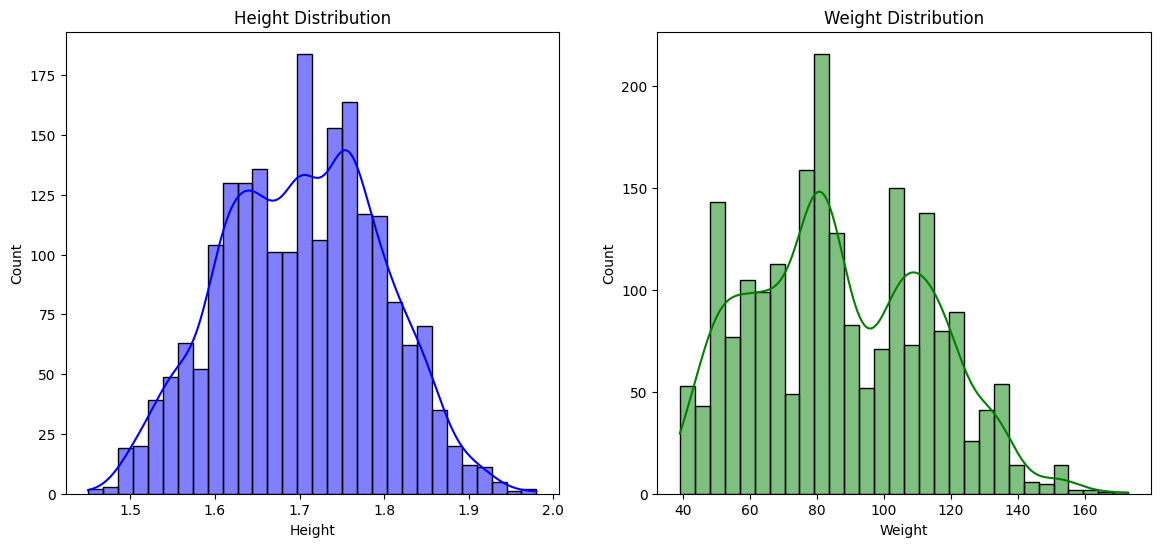

In [ ]:
%matplotlib inline
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Height'], bins=30, kde=True, color='blue')
plt.title('Height Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Weight'], bins=30, kde=True, color='green')
plt.title('Weight Distribution')

plt.show()


 #### 2. Top 10 Ages with Highest Weight

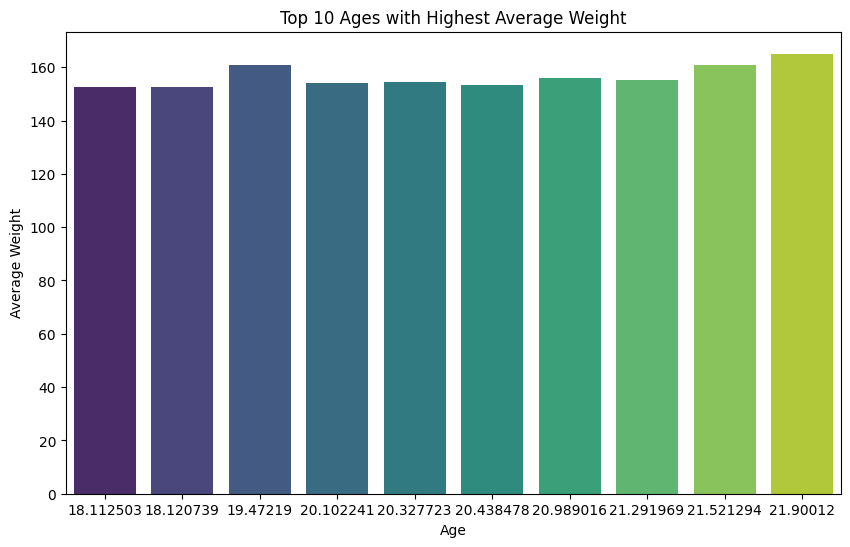

In [ ]:
top_ages = df.groupby('Age')['Weight'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ages.index, y=top_ages.values, palette='viridis')
plt.title('Top 10 Ages with Highest Average Weight')
plt.xlabel('Age')
plt.ylabel('Average Weight')
plt.show()


#### 3. Distribution of CAEC values

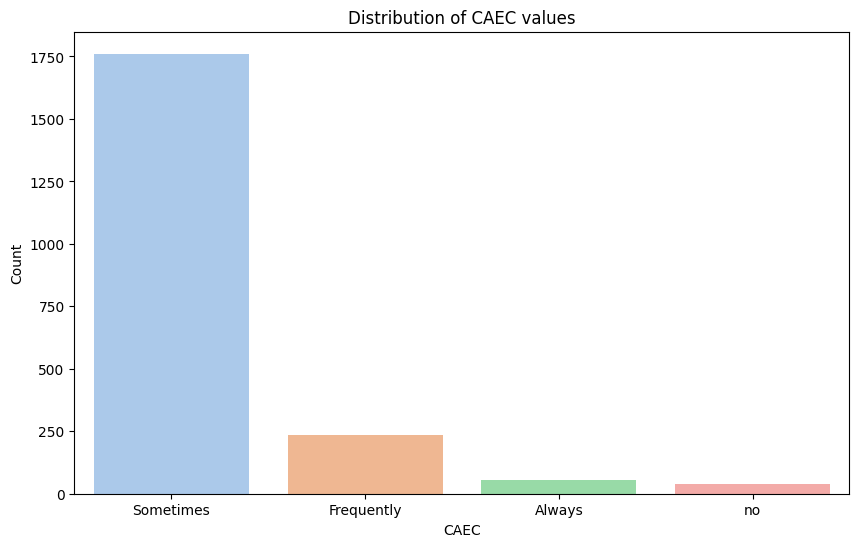

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CAEC', data=df, palette='pastel')
plt.title('Distribution of CAEC values')
plt.xlabel('CAEC')
plt.ylabel('Count')
plt.show()


#### 4. Average Ages with Family History with Overweight

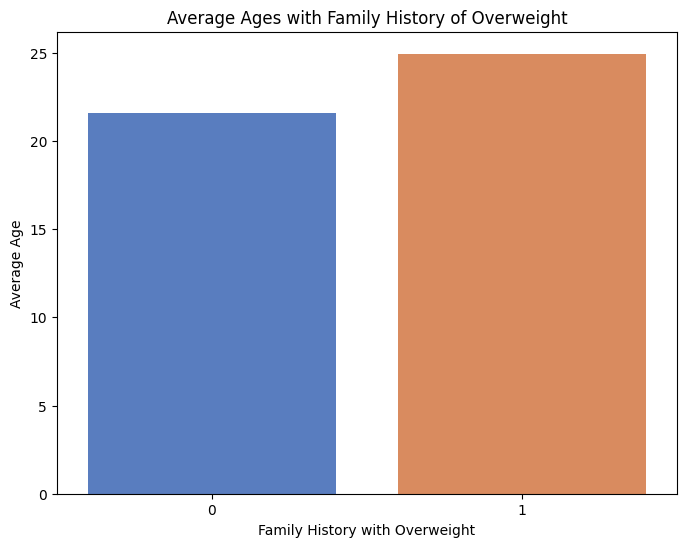

In [ ]:
avg_age_family_history = df.groupby('family_history_with_overweight')['Age'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_age_family_history.index, y=avg_age_family_history.values, palette='muted')
plt.title('Average Ages with Family History of Overweight')
plt.xlabel('Family History with Overweight')
plt.ylabel('Average Age')
plt.show()


#### 5. Correlation Matrix

In [ ]:
# No. of total cols present in a dataframe
print("No. of total cols present in a dataframe:", len(df.columns))

# No. of all the "Numeric" col's
print("No. of all the `Numeric` col's:",len(df.select_dtypes(include=['int64', 'float64']).columns))

No. of total cols present in a dataframe: 17
No. of all the `Numeric` col's: 13


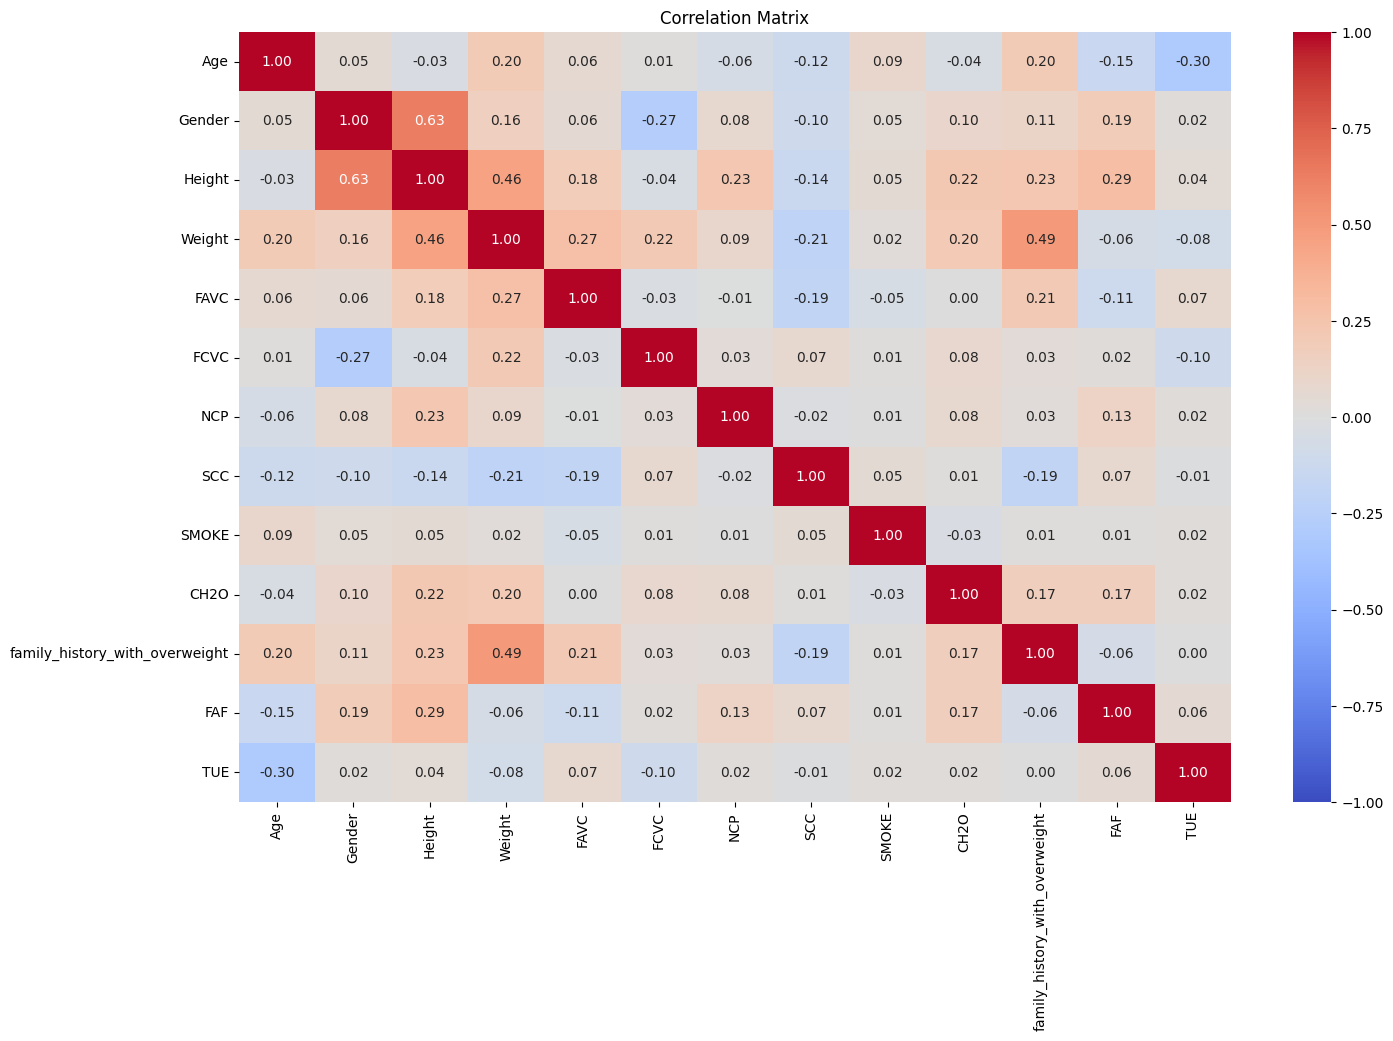

In [ ]:
# Compute correlation matrix
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Display the correlation matrix
# %matplotlib inline
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

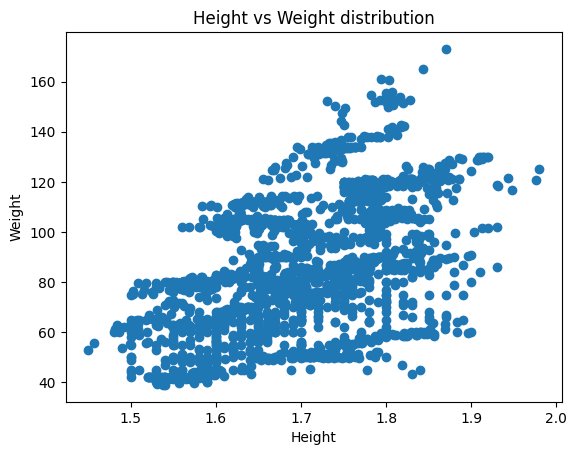

In [ ]:
%matplotlib inline
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight distribution')
plt.show()

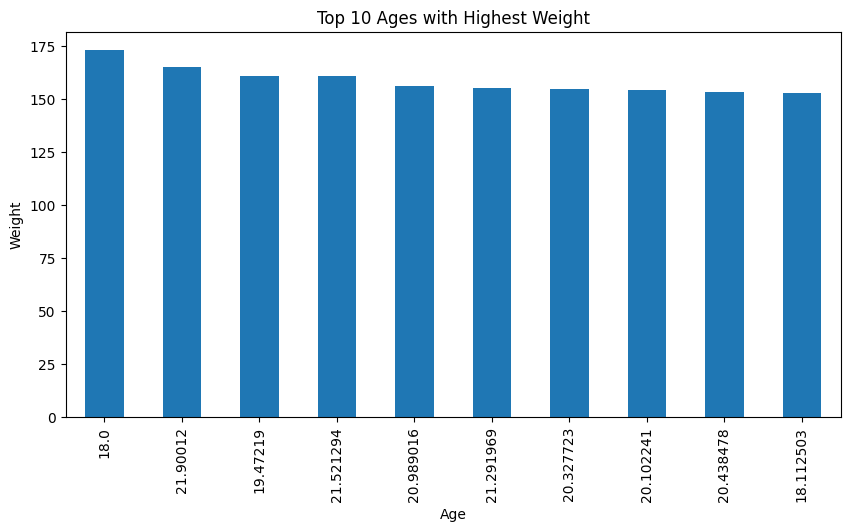

In [ ]:
import matplotlib.pyplot as plt

# Group by 'Age' and get the maximum 'Weight', then get the top 10 ages with the highest weights
top_ages = df.groupby('Age')['Weight'].max().nlargest(10)

# Plotting the results
top_ages.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Top 10 Ages with Highest Weight')
plt.show()


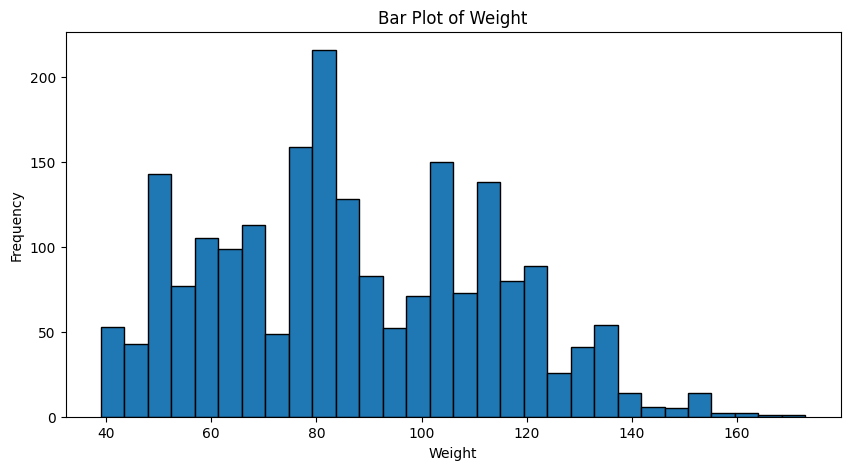

In [ ]:
# Bar plot of Weight
plt.figure(figsize=(10, 5))
plt.hist(df['Weight'], bins=30, edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Bar Plot of Weight')
plt.show()

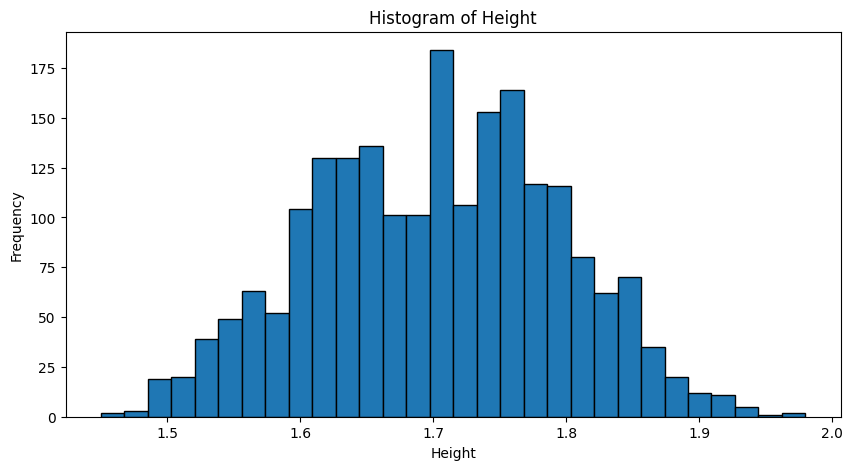

In [ ]:
# Histogram of Height
plt.figure(figsize=(10, 5))
plt.hist(df['Height'], bins=30, edgecolor='black')  # You can adjust the number of bins as needed
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Histogram of Height')
plt.show()


In [ ]:
df.dtypes

,0
Age,float64
Gender,int64
Height,float64
Weight,float64
CALC,object
FAVC,int64
FCVC,float64
NCP,float64
SCC,int64
SMOKE,int64


#### Check Data Distribution

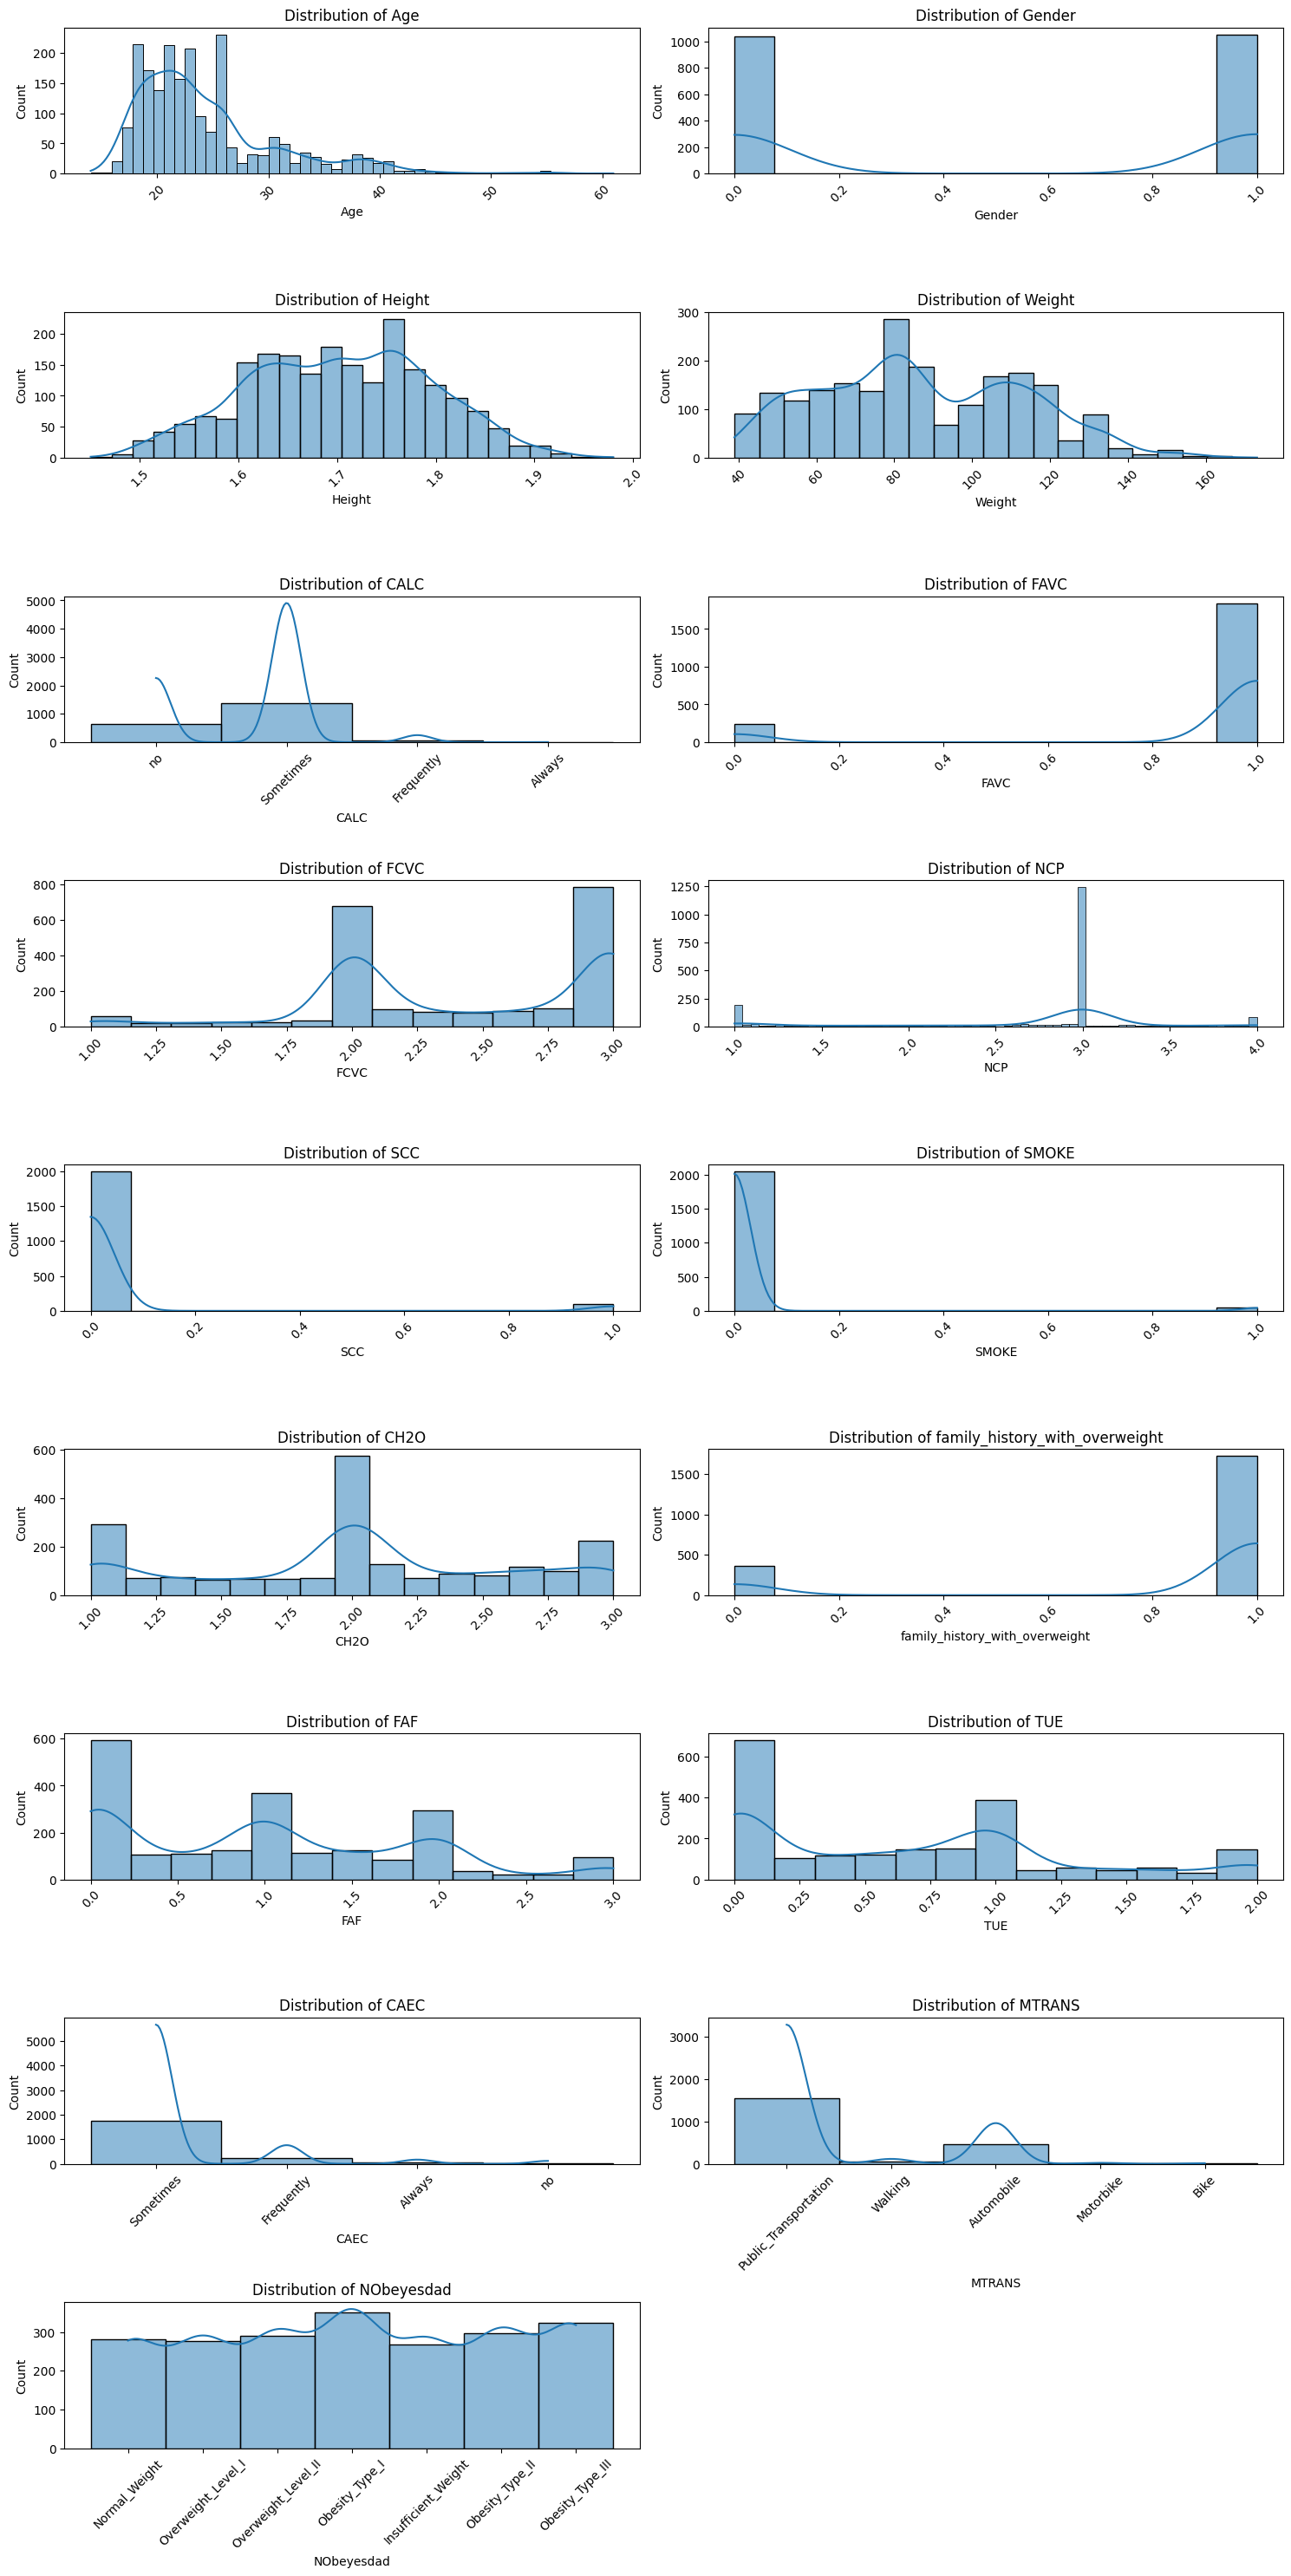

In [ ]:
plt.figure(figsize=(15, 35))

# Iterate through each channel and plot on a separate subplot
for i, column in enumerate(df.columns):
    plt.subplot(11, 2, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Step 3: Data Preprocessing

In [ ]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category'])

# Display the categorical columns
categorical_cols


,CALC,CAEC,MTRANS,NObeyesdad
0,no,Sometimes,Public_Transportation,Normal_Weight
1,Sometimes,Sometimes,Public_Transportation,Normal_Weight
2,Frequently,Sometimes,Public_Transportation,Normal_Weight
3,Frequently,Sometimes,Walking,Overweight_Level_I
4,Sometimes,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...
2082,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III
2083,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III
2084,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III
2085,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df["CALC"].value_counts()

,count
CALC,
Sometimes,1380
no,636
Frequently,70
Always,1


In [ ]:
df["CAEC"].value_counts()

,count
CAEC,
Sometimes,1761
Frequently,236
Always,53
no,37


In [ ]:
df["MTRANS"].value_counts()

,count
MTRANS,
Public_Transportation,1558
Automobile,456
Walking,55
Motorbike,11
Bike,7


In [ ]:
df["NObeyesdad"].value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_II,290
Normal_Weight,282
Overweight_Level_I,276
Insufficient_Weight,267


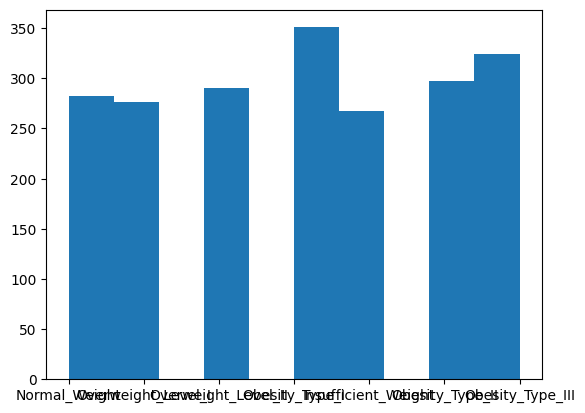

In [ ]:
plt.hist(df["NObeyesdad"]);

###    Apply Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder


# Define the custom order for ordinal encoding
custom_order = [
    'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
    'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'
]

# Initialize OrdinalEncoder with the custom order
ordinal_encoder = OrdinalEncoder(categories=[custom_order])

# Fit and transform the 'NObeyesdad' column
df['NObeyesdad_encoded'] = ordinal_encoder.fit_transform(df[['NObeyesdad']]).astype(int)

df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,NObeyesdad_encoded
0,21.000,0,1.620,64.000,no,0,2.000,3.000,0,0,2.000,1,0.000,1.000,Sometimes,Public_Transportation,Normal_Weight,1
1,21.000,0,1.520,56.000,Sometimes,0,3.000,3.000,1,1,3.000,1,3.000,0.000,Sometimes,Public_Transportation,Normal_Weight,1
2,23.000,1,1.800,77.000,Frequently,0,2.000,3.000,0,0,2.000,1,2.000,1.000,Sometimes,Public_Transportation,Normal_Weight,1
3,27.000,1,1.800,87.000,Frequently,0,3.000,3.000,0,0,2.000,0,2.000,0.000,Sometimes,Walking,Overweight_Level_I,2
4,22.000,1,1.780,89.800,Sometimes,0,2.000,1.000,0,0,2.000,0,0.000,0.000,Sometimes,Public_Transportation,Overweight_Level_II,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,20.977,0,1.711,131.409,Sometimes,1,3.000,3.000,0,0,1.728,1,1.676,0.906,Sometimes,Public_Transportation,Obesity_Type_III,6
2083,21.983,0,1.749,133.743,Sometimes,1,3.000,3.000,0,0,2.005,1,1.341,0.599,Sometimes,Public_Transportation,Obesity_Type_III,6
2084,22.524,0,1.752,133.689,Sometimes,1,3.000,3.000,0,0,2.054,1,1.414,0.646,Sometimes,Public_Transportation,Obesity_Type_III,6
2085,24.362,0,1.739,133.347,Sometimes,1,3.000,3.000,0,0,2.852,1,1.139,0.586,Sometimes,Public_Transportation,Obesity_Type_III,6


In [ ]:
# Drop the original categorical target column
df.drop('NObeyesdad', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2087 non-null   float64
 1   Gender                          2087 non-null   int64  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   CALC                            2087 non-null   object 
 5   FAVC                            2087 non-null   int64  
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   SCC                             2087 non-null   int64  
 9   SMOKE                           2087 non-null   int64  
 10  CH2O                            2087 non-null   float64
 11  family_history_with_overweight  2087 non-null   int64  
 12  FAF                             20

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming the DataFrame 'df' is already loaded and 'NObeyesdad' has been encoded and dropped

# Define the label encoder
label_encoder = LabelEncoder()

# List of categorical columns to label encode
categorical_cols_to_encode = ['CALC', 'CAEC', 'MTRANS']

# Apply LabelEncoder to each categorical column
for col in categorical_cols_to_encode:
    df[col] = label_encoder.fit_transform(df[col])


In [ ]:
# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2087 non-null   float64
 1   Gender                          2087 non-null   int64  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   CALC                            2087 non-null   int64  
 5   FAVC                            2087 non-null   int64  
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   SCC                             2087 non-null   int64  
 9   SMOKE                           2087 non-null   int64  
 10  CH2O                            2087 non-null   float64
 11  family_history_with_overweight  2087 non-null   int64  
 12  FAF                             20

In [ ]:
# df.dtypes

In [ ]:
# Report = ProfileReport(df)
# Report

In [ ]:
# Resolving the Discrepancy

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns based on 'object' dtype:", categorical_columns)

# Manually inspect numeric columns with few unique values
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    unique_values = df[col].nunique()
    print(f"Column: {col}, Unique Values: {unique_values}")
    if unique_values < 2:  # Define your threshold here
        categorical_columns.append(col)

print()
print()
print("Final list of categorical columns:", categorical_columns)


Categorical columns based on 'object' dtype: []
Column: Age, Unique Values: 1402
Column: Gender, Unique Values: 2
Column: Height, Unique Values: 1574
Column: Weight, Unique Values: 1525
Column: CALC, Unique Values: 4
Column: FAVC, Unique Values: 2
Column: FCVC, Unique Values: 810
Column: NCP, Unique Values: 635
Column: SCC, Unique Values: 2
Column: SMOKE, Unique Values: 2
Column: CH2O, Unique Values: 1268
Column: family_history_with_overweight, Unique Values: 2
Column: FAF, Unique Values: 1190
Column: TUE, Unique Values: 1129
Column: CAEC, Unique Values: 4
Column: MTRANS, Unique Values: 5
Column: NObeyesdad_encoded, Unique Values: 7


Final list of categorical columns: []


### Check Distribution
    Histograms are useful for visualizing the distribution of individual numerical columns.

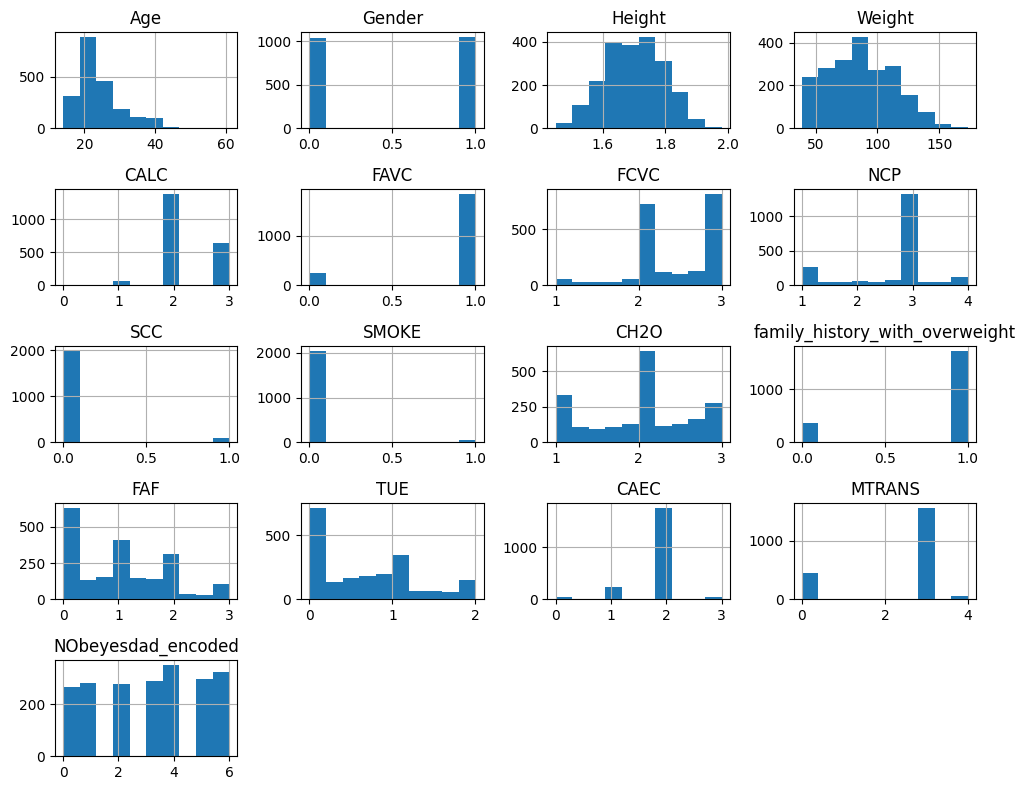

In [ ]:
# Plot histograms for each numerical column
%matplotlib inline
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


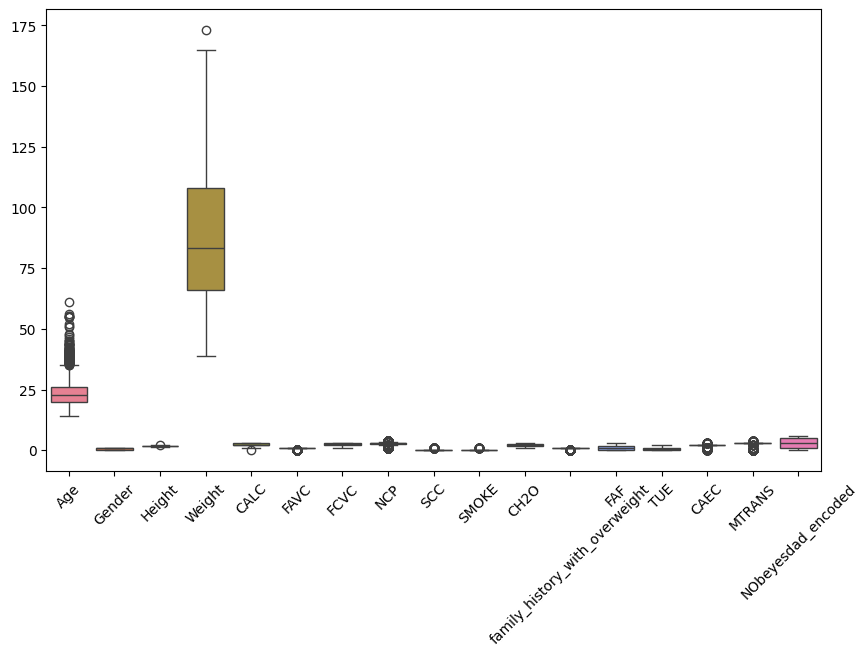

In [ ]:
# Plot box plots for each numerical column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


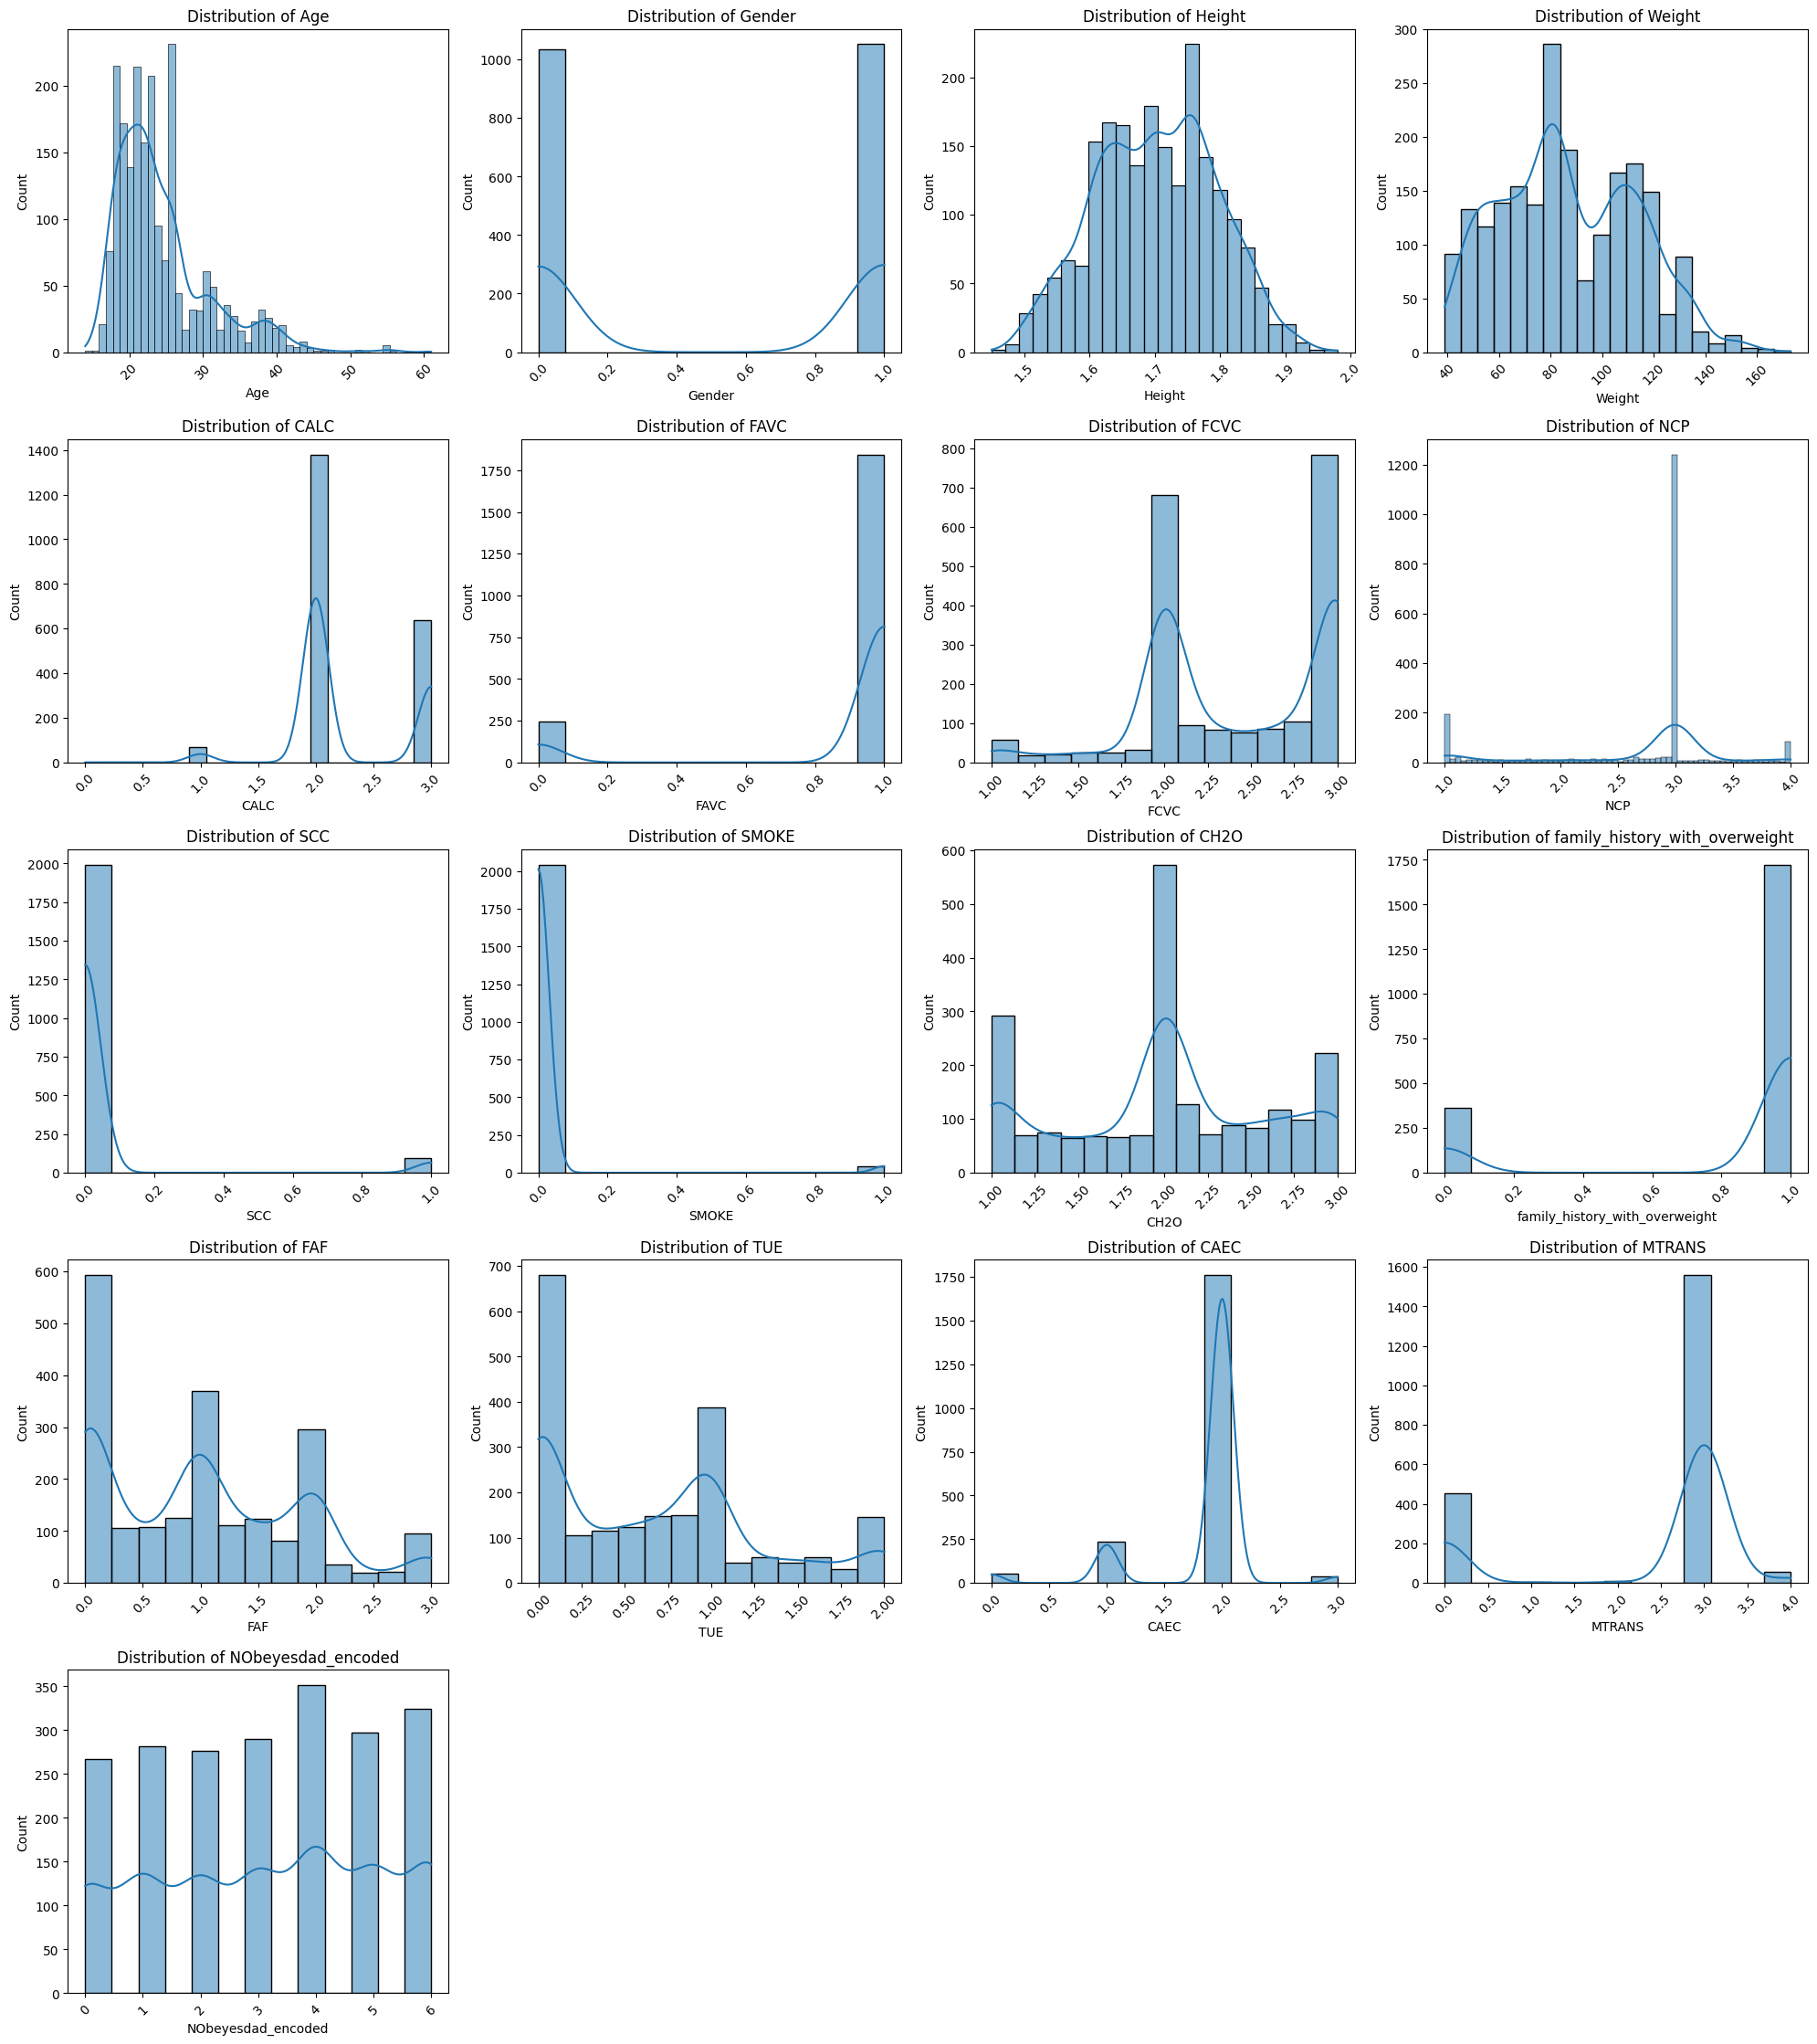

In [ ]:
numerical_columns = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 40))

# Iterate through each channel and plot on a separate subplot
for i, column in enumerate(numerical_columns):
    plt.subplot(9, 4, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


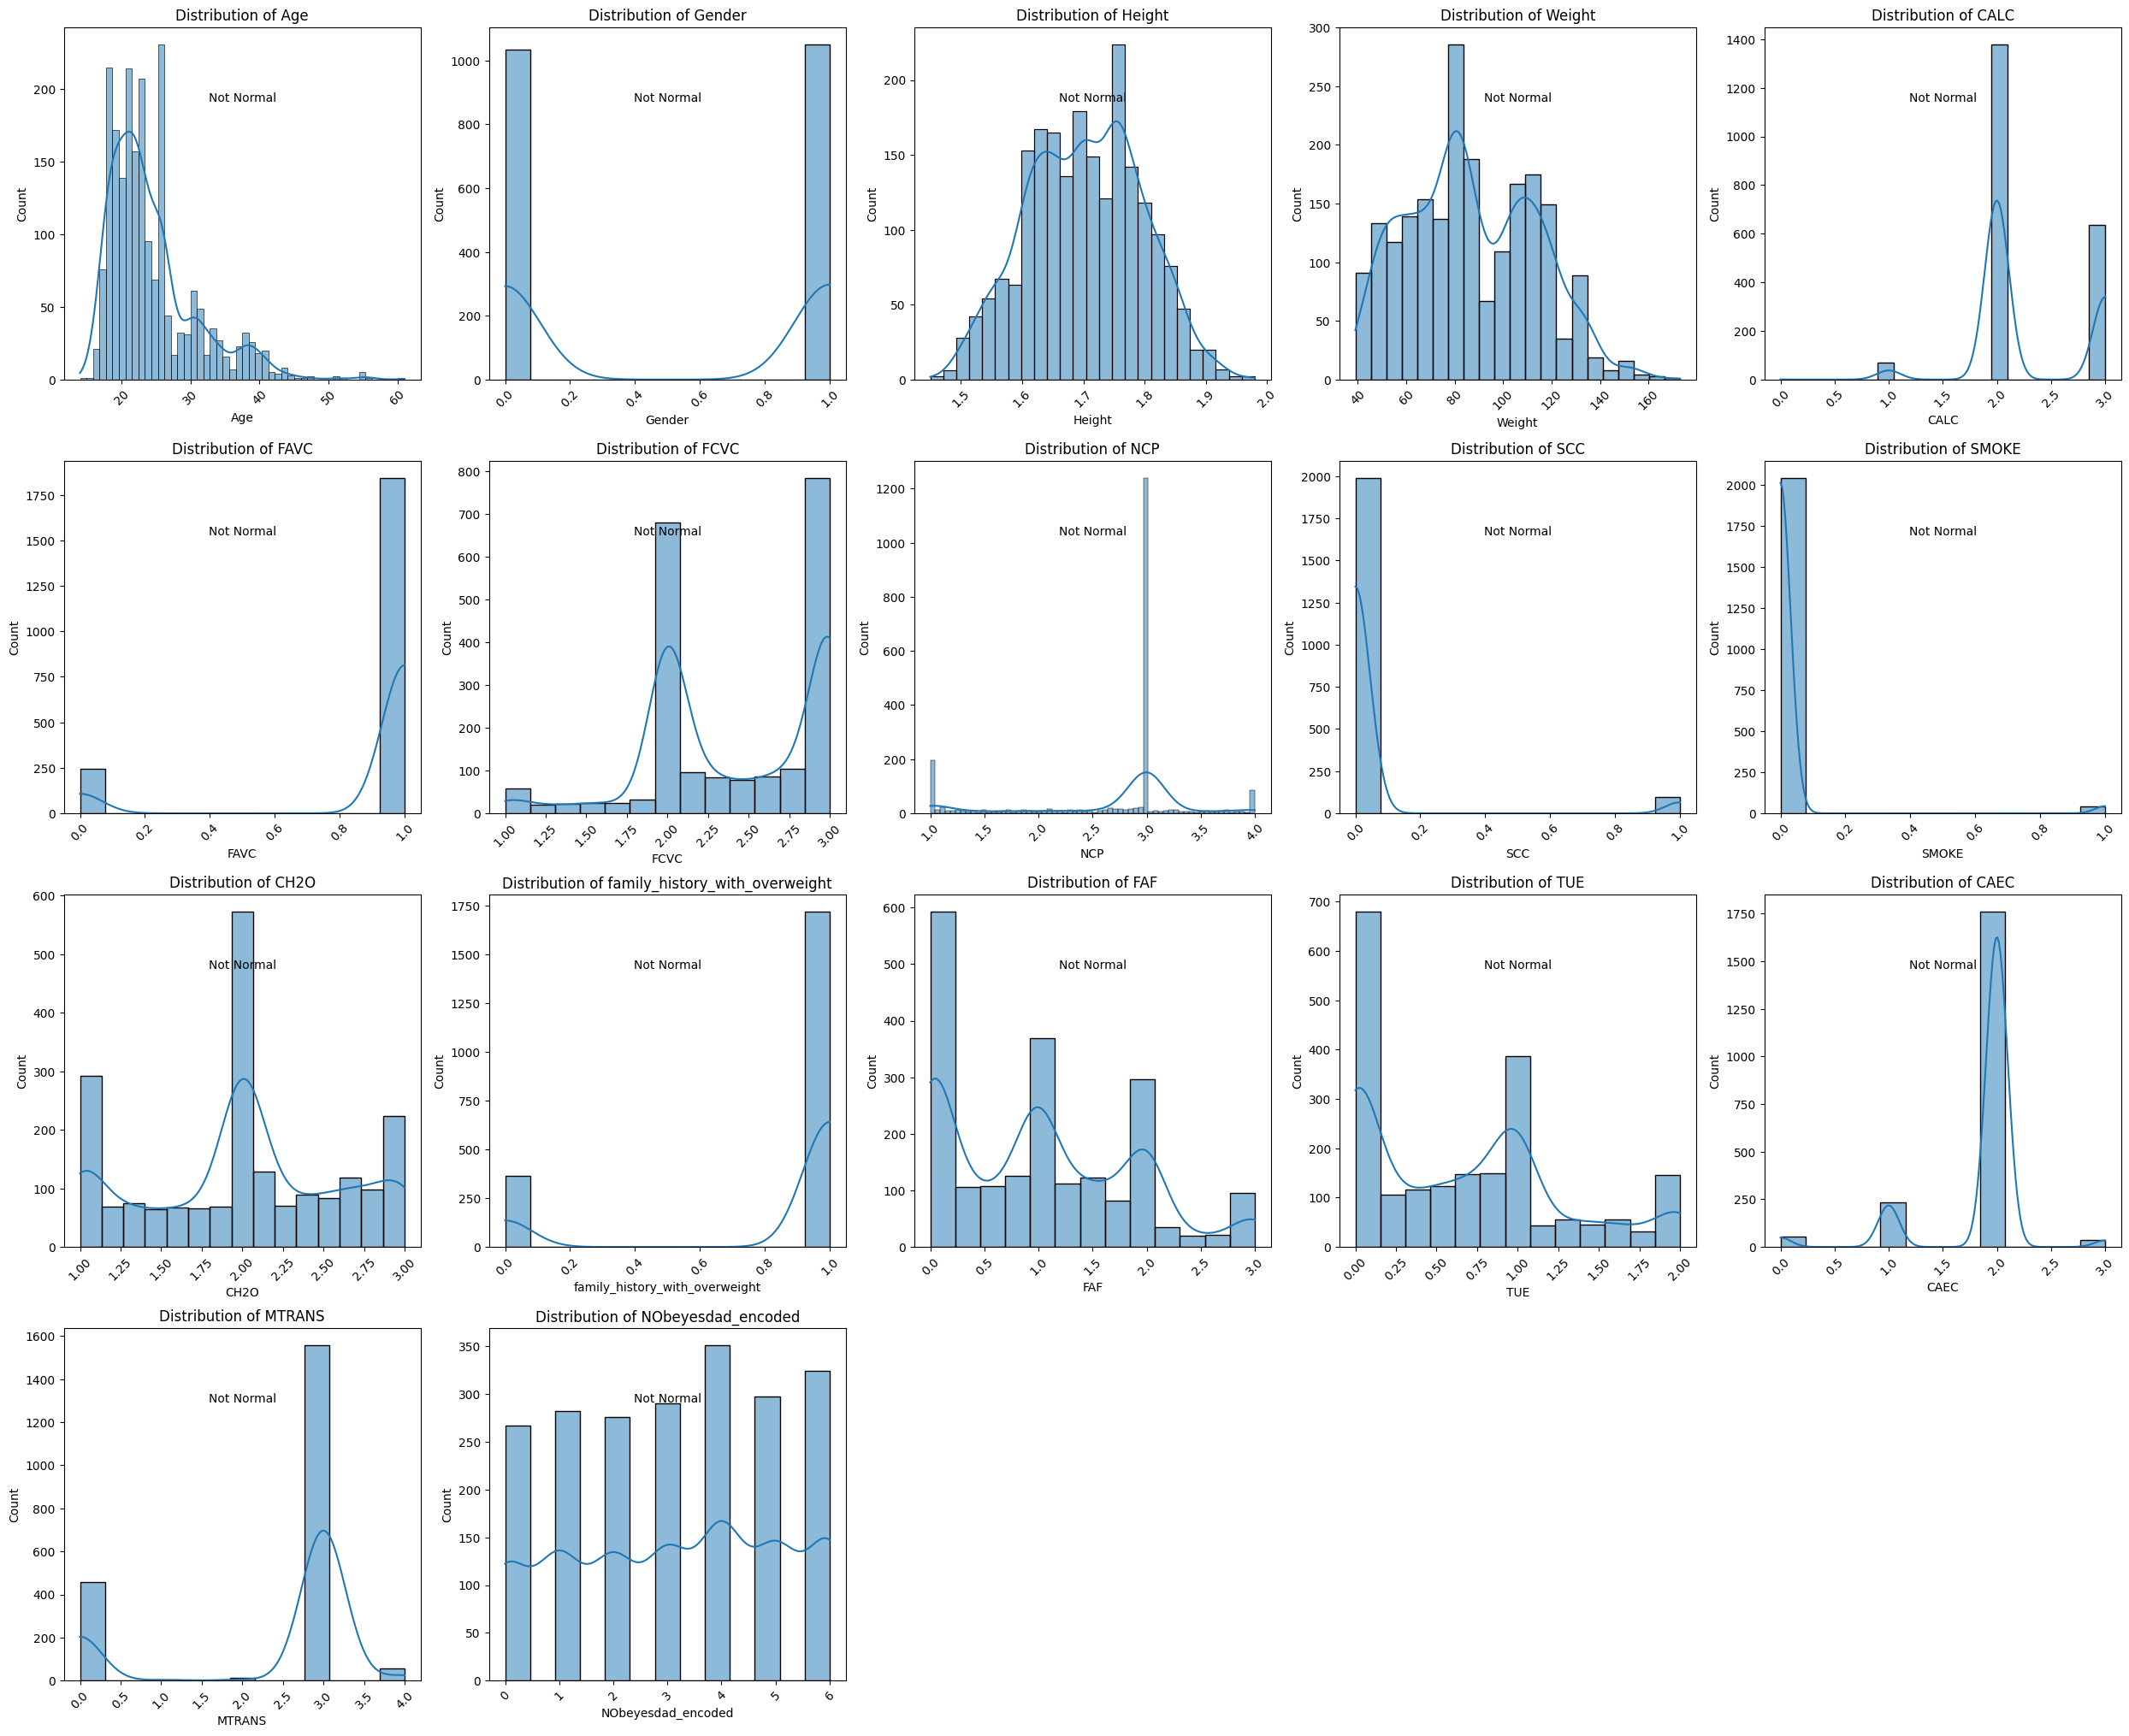

In [ ]:
plt.figure(figsize=(25, 30))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(df.columns):
    plt.subplot(6, 5, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Add additional analysis to detect distribution type
    # Check for normal distribution
    k2, p = stats.normaltest(df[column])
    # null hyposthesis => The sample is from Normal dsitribution
    if (p < 0.05) | (np.isnan(p)):
        plt.text(0.5, 0.8, "Not Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.8, "Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Checking skewness of the col's

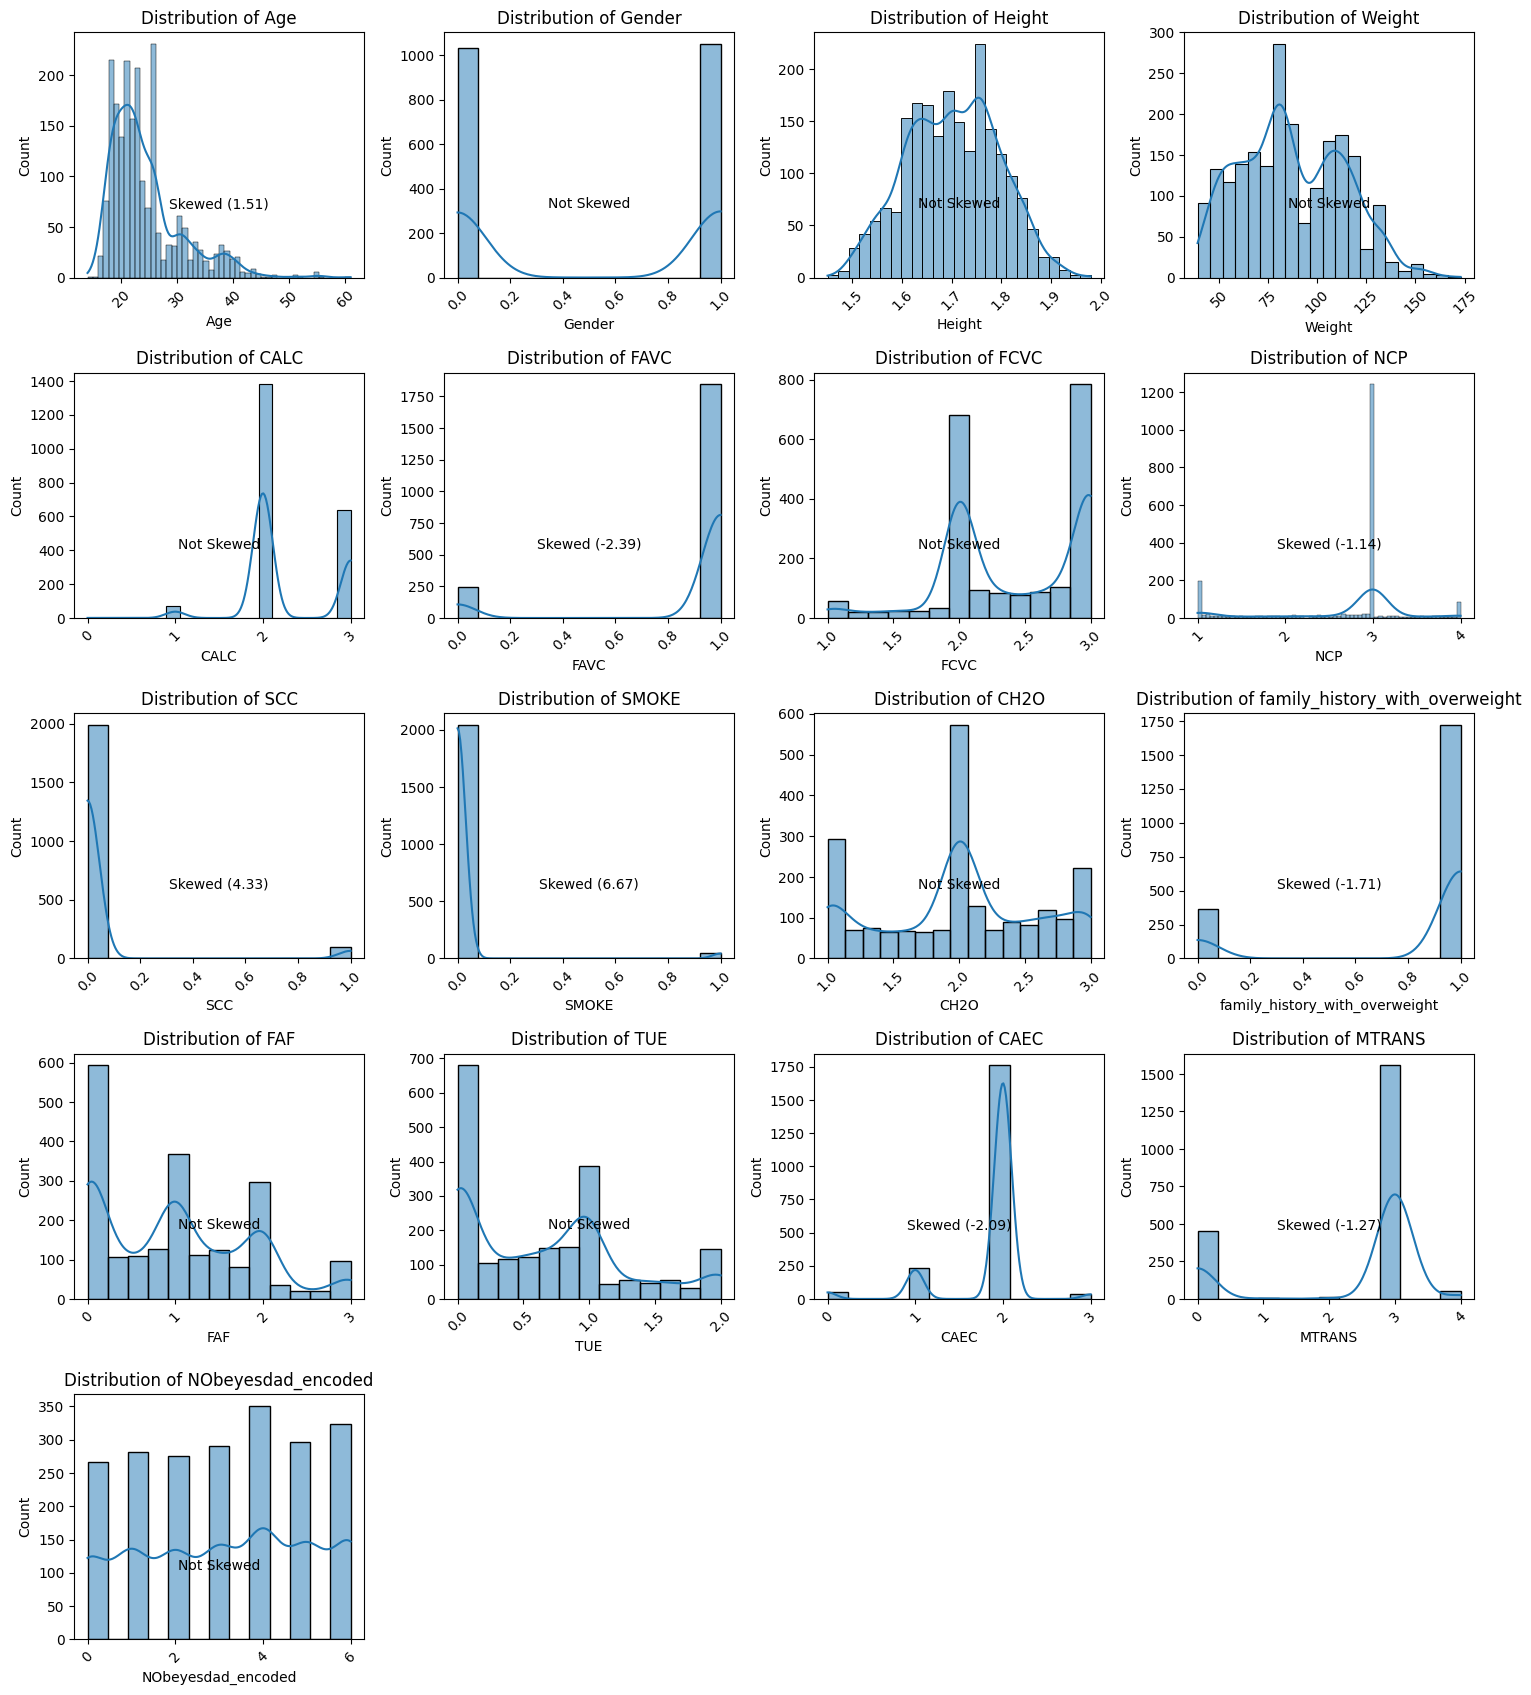

In [ ]:
Splt.figure(figsize=(15, 20))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(df.columns):
    plt.subplot(6, 4, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Check for skewness
    skewness = stats.skew(df[column])
    if skewness < -1 or skewness > 1:
        plt.text(0.5, 0.3, f"Skewed ({skewness:.2f})", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.3, f"Not Skewed", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Outlier Detection

###    Using Z-Score

In [ ]:
# Function to detect outliers using Z-score for a specific column
def detect_outliers_z_score(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    outliers = (np.abs(z_scores) > threshold).any(axis=1)
    return outliers

In [ ]:
# Detect outliers for each numeric column
outliers = detect_outliers_z_score(df[df.columns])

# Print indices of rows containing outliers
outlier_indices = df.index[outliers].tolist()
print("Index of rows with outliers:", outlier_indices)
print("Count of outliers:", len(outlier_indices))


Index of rows with outliers: [1, 11, 15, 18, 21, 25, 26, 28, 36, 43, 53, 54, 66, 67, 68, 70, 71, 72, 75, 80, 82, 83, 88, 90, 91, 92, 93, 101, 105, 117, 118, 123, 125, 130, 131, 135, 136, 139, 140, 142, 146, 150, 158, 159, 160, 161, 163, 164, 167, 171, 173, 174, 175, 179, 186, 187, 188, 195, 196, 197, 200, 202, 211, 214, 216, 225, 226, 230, 233, 236, 237, 238, 239, 242, 246, 251, 255, 258, 262, 271, 274, 279, 288, 294, 296, 297, 299, 300, 302, 304, 306, 308, 313, 326, 327, 331, 332, 337, 338, 339, 342, 344, 357, 364, 373, 377, 383, 391, 394, 404, 406, 407, 409, 413, 414, 418, 422, 430, 451, 454, 456, 462, 468, 472, 476, 481, 482, 483, 486, 509, 510, 511, 589, 590, 591, 602, 621, 629, 644, 648, 684, 699, 723, 724, 725, 769, 770, 776, 778, 779, 787, 844, 845, 846, 854, 855, 858, 859, 860, 871, 927, 928, 929, 935, 936, 938, 939, 940, 941, 952, 989, 1010, 1039, 1064, 1077, 1134, 1155, 1184, 1191, 1243, 1262, 1281, 1362, 1466, 1501, 1502, 1559, 1560, 1625, 1626, 1651, 1652, 1703, 1704, 1739,

**Remove Outliers based on Z-score**

In [ ]:
# from scipy.stats import zscore

# # Remove outliers based on Z-score for the BMI column
# def remove_outliers_z_score_column(df, column_name, threshold = 3):
#     z_scores = zscore(df[column_name])
#     filtered_data = df[np.abs(z_scores) <= threshold]
#     return filtered_data

In [ ]:
# # Detect outliers and remove them based on Z-score for all columns
# def remove_outliers_z_score(df, threshold=3):
#     z_scores = np.abs(zscore(df))
#     filtered_data = df[(z_scores < threshold).all(axis=1)]
#     return filtered_data

In [ ]:
# # Apply the function to remove outliers from all columns
# df_filtered = remove_outliers_z_score(df)

In [ ]:
# # Reset index of the filtered DataFrame
# df_filtered.reset_index(drop=True, inplace=True)

In [ ]:
# # df_filtered.info()
# df_filtered.describe().T

In [ ]:
# # Plot box plots for each numerical column
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df_filtered)
# plt.xticks(rotation=45)
# plt.show()


In [ ]:
# plt.figure(figsize=(15, 20))

# # Iterate through each column and plot on a separate subplot
# for i, column in enumerate(df_filtered.columns):
#     plt.subplot(6, 4, i+1)
#     sns.histplot(df_filtered[column], kde=True)
#     plt.title(f'Distribution of {column}')
#     plt.xticks(rotation=45)

#     # Check for skewness
#     skewness = stats.skew(df_filtered[column])
#     if skewness < -1 or skewness > 1:
#         plt.text(0.5, 0.3, f"Skewed ({skewness:.2f})", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
#     else:
#         plt.text(0.5, 0.3, f"Not Skewed", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# # Adjust layout and show the plot
# plt.tight_layout()
# plt.show()

***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2087 non-null   float64
 1   Gender                          2087 non-null   int64  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   CALC                            2087 non-null   int64  
 5   FAVC                            2087 non-null   int64  
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   SCC                             2087 non-null   int64  
 9   SMOKE                           2087 non-null   int64  
 10  CH2O                            2087 non-null   float64
 11  family_history_with_overweight  2087 non-null   int64  
 12  FAF                             20

### Machine Learning Algorithms
- Define X and y
- Spliting data into Feature Matrix (X) and Target Vector (y)

In [ ]:
# Feature matrix
X = df.drop('NObeyesdad_encoded', axis=1)

# target vector
y = df['NObeyesdad_encoded']

In [ ]:
X.shape

(2087, 16)

In [ ]:
y.shape

(2087,)

###  Use any train test split.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1669, 16), (418, 16), (1669,), (418,))

### Using Normalization

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit the scaler on the training data and transform the training data
# X_train_scaled = scaler.fit_transform(X_train)

# # Transform the test data using the same scaler
# X_test_scaled = scaler.transform(X_test)

# # Check the shapes to ensure everything is correct
# print(X_train_scaled.shape)  # should be (1669, 16)
# print(X_test_scaled.shape)   # should be (418, 16)


In [ ]:
# # Converting the scaled data back to DataFrame for easier handling (optional)
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# # Display the shapes of the resulting datasets
# print(f"X_train_scaled shape: {X_train_scaled.shape}")
# print(f"X_test_scaled shape: {X_test_scaled.shape}")
# print(f"y_train shape: {y_train.shape}")
# print(f"y_test shape: {y_test.shape}")

In [ ]:
# numerical_columns = X_train_scaled.select_dtypes(include=np.number).columns

# plt.figure(figsize=(20, 40))

# # Iterate through each channel and plot on a separate subplot
# for i, column in enumerate(numerical_columns):
#     plt.subplot(9, 4, i+1)
#     sns.histplot(X_train_scaled[column], kde=True)
#     plt.title(f'Distribution of {column}')
#     plt.xticks(rotation=45)

# # Adjust layout and show the plot
# plt.tight_layout()
# plt.show()


### Using standardization

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Check the shapes to ensure everything is correct
print(X_train_scaled.shape)  # should be (1669, 16)
print(X_test_scaled.shape)   # should be (418, 16)


(1669, 16)
(418, 16)


In [ ]:
# Converting the scaled data back to DataFrame for easier handling (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the shapes of the resulting datasets
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_scaled shape: (1669, 16)
X_test_scaled shape: (418, 16)
y_train shape: (1669,)
y_test shape: (418,)


In [ ]:



# Initialize and train different classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(f"{name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()
    print()

Logistic Regression Accuracy: 0.8660287081339713

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        59
           1       0.84      0.62      0.72        61
           2       0.75      0.75      0.75        55
           3       0.70      0.82      0.75        49
           4       0.93      0.91      0.92        70
           5       0.97      1.00      0.98        64
           6       1.00      1.00      1.00        60

    accuracy                           0.87       418
   macro avg       0.86      0.86      0.86       418
weighted avg       0.87      0.87      0.86       418

Confusion Matrix:
[[55  4  0  0  0  0  0]
 [11 38 10  2  0  0  0]
 [ 0  3 41 11  0  0  0]
 [ 0  0  4 40  5  0  0]
 [ 0  0  0  4 64  2  0]
 [ 0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0 60]]


K-Nearest Neighbors Accuracy: 0.8038277511961722

K-Nearest Neighbors Classification Report:
              precision    r

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff


# Define the models to evaluate
models = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Function to perform cross-validation and evaluate models
def ML_func_with_cross_validation(X_train, X_test, y_train, y_test, num_folds=5):
    accuracy = {}
    mislabeled_points = {}

    for classifier_name, classifier in models.items():
        # Cross-validation scores
        cv_scores = cross_val_score(classifier, X_train, y_train, cv=num_folds)
        mean_cv_score = np.mean(cv_scores)
        std_cv_score = np.std(cv_scores)

        # Fit the classifier on the training data and predict on the test data
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        # Calculate accuracy and number of mislabeled points
        test_accuracy = accuracy_score(y_test, y_pred)
        num_mislabeled_points = np.sum(y_test != y_pred)

        # Store the results
        accuracy[classifier_name] = test_accuracy
        mislabeled_points[classifier_name] = num_mislabeled_points

        # Print the results
        print(f'{classifier_name}')
        print(f'Cross-Validation Scores: {cv_scores}')
        print(f'Mean Accuracy: {mean_cv_score:.2f} (+/- {std_cv_score:.2f})')
        print(f'Number of mislabeled points out of a total {len(y_test)} points: {num_mislabeled_points}')
        print('----------------------------------------')

    # Creating comparison charts with Plotly
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=list(mislabeled_points.values()),
        y=list(mislabeled_points.keys()),
        orientation='h',
        name='Mislabeled Points',
        marker=dict(color='crimson'),
        text=list(mislabeled_points.values())  # Add value labels
    ))

    fig.add_trace(go.Bar(
        x=list(accuracy.values()),
        y=list(accuracy.keys()),
        orientation='h',
        name='Accuracy',
        marker=dict(color='lightseagreen'),
        text=list(accuracy.values())  # Add value labels
    ))

    fig.update_layout(
        title='Model Comparison: Accuracy and Mislabeled Points',
        xaxis_title='Scores',
        yaxis_title='Models',
        barmode='group',
        height=600,
        width=800
    )

    fig.show()

# Example call
ML_func_with_cross_validation(X_train, X_test, y_train, y_test, num_folds=5)


Gaussian Naive Bayes
Cross-Validation Scores: [0.57185629 0.57185629 0.52694611 0.59580838 0.58858859]
Mean Accuracy: 0.57 (+/- 0.02)
Number of mislabeled points out of a total 418 points: 165
----------------------------------------
Multinomial Naive Bayes
Cross-Validation Scores: [0.59580838 0.57185629 0.56586826 0.54790419 0.61261261]
Mean Accuracy: 0.58 (+/- 0.02)
Number of mislabeled points out of a total 418 points: 172
----------------------------------------
KNN
Cross-Validation Scores: [0.84131737 0.86227545 0.85628743 0.81437126 0.87987988]
Mean Accuracy: 0.85 (+/- 0.02)
Number of mislabeled points out of a total 418 points: 48
----------------------------------------
Logistic Regression
Cross-Validation Scores: [0.83832335 0.79640719 0.82035928 0.82035928 0.85285285]
Mean Accuracy: 0.83 (+/- 0.02)
Number of mislabeled points out of a total 418 points: 70
----------------------------------------
SVM
Cross-Validation Scores: [0.52994012 0.58682635 0.5239521  0.4760479  0.60960

In [ ]:
# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the best model
best_gbc = grid_search.best_estimator_
best_gbc.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_gbc.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Gradient Boosting Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 729 candidates, totalling 2187 fits


**<------------------------------------------------------------------------------------------------------------------------------------------>**